# PCA (Principal Component Analysis)
### PCA 개요
- PCA : 가장 대표적인 차원 축소 기법. 여러 변수간에 존재하는 상관관계를 이용해 이를 대표하는 주성분(principal component)을 추출해 차원을 축소하는 기법
- 차원을 축소할 때 기존 데이터의 정보 유실을 최소화하기 위해 가장 높은 분산을 가지는 데이터의 축을 찾아 이 축으로 차원을 축소
- PCA의 주성분이 됨 (분산이 데이터의 특성을 가장 잘 나타내는 것으로 간주)
- 가장 큰 데이터 변동성(variance)을 기반으로 첫번째 벡터 축 생성
- 두번째 벡터 축은 해당 벡터축에 직각이 되는 벡터 (직교벡터)를 축으로 함
- 다음 축은 다시 두번째 축과 직각이 되는 벡터를 설정하는 방식으로 축 생성

#### 고유벡터
- 행렬 A를 곱하더라도 방향이 변하지 않고 그 크기만 변하는 벡터
- 행렬이 작용하는 힘의 방향과 관계가 있어 행렬을 분해하는 데 사용

#### 공분산 행렬(covariance matrix)
- 정방행렬이며 대칭행렬이며, 개별 분산값을 대각 원소로 하는 대칭행렬
- 대각 원소는 각 변수의 분산이며 대각선 이외의 원소는 가능한 모든 변수 쌍 간의 공분산
- 공분산 행렬 C는 (고유벡터 직교행렬) (고유값 정방 행렬) (고유벡터 직교 행렬의 전치 행렬)로 분해됨

In [1]:
# 4개의 속성으로 되어 있는 붓꽃 데이터 세트
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

iris=load_iris()
# 넘파이 데이터 세트를 판다스 DataFrame으로 변환
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(iris.data, columns=columns)
irisDF['target']=iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


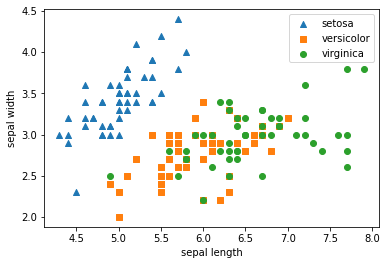

In [2]:
# 품종에 따른 원본 붓꽃 데이터 세트 분포 2차원 시각화
# setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers = ['^', 's', 'o']

# setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target별로 다른 모양으로 산점도로 표시
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [3]:
from sklearn.preprocessing import StandardScaler

# Target 값을 제외한 모든 속성 값을 StandardScaler를 이용해 표준 정규 분포를 가지는 값들로 변환
iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:,:-1])


from sklearn.decomposition import PCA

pca = PCA(n_components=2) # n_components는 PCA로 변환할 차원의 수 의미

# fit()과 transform()을 호출해 PCA 변환 데이터 반환
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [4]:
# PCA 변환된 데이터의 칼럼 명을 각각 pca_component_1, pca_component_2로 명명
pca_columns = ['pca_component_1', 'pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca, columns=pca_columns)
irisDF_pca['target']=iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


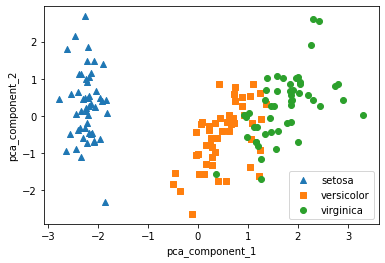

In [5]:
# setosa를 세모, versicolor를 네모, virginica를 동그라미로 표시
markers = ['^', 's', 'o']

# pca_component_1를 x축, pca_component_2를 y축으로 scatter plot 수행
for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

In [6]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


In [7]:
# 원본 붓꽃 데이터 세트와 PCA로 변환된 데이터 세트에 각각 분류를 적용한 후 결과를 비교
# 원본 붓꽃 데이터에 랜덤 포레스트 적용

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target, scoring='accuracy', cv=3)
print('원본 데이터 교차 검증 개별 정확도:',scores)
print('원본 데이터 평균 정확도:', np.mean(scores))

원본 데이터 교차 검증 개별 정확도: [0.98 0.94 0.96]
원본 데이터 평균 정확도: 0.96


In [8]:
# 기존 4차원 데이터를 2차원으로 PCA 변환한 데이터 세트에 랜덤 포레스트 적용
pca_X = irisDF_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3)
print('PCA 변환 데이터 교차 검증 개별 정확도:',scores_pca)
print('PCA 변환 데이터 평균 정확도:', np.mean(scores_pca))

PCA 변환 데이터 교차 검증 개별 정확도: [0.88 0.88 0.88]
PCA 변환 데이터 평균 정확도: 0.88


In [11]:
# header로 의미 없는 첫 행 제거, iloc으로 기존 id 제거
import pandas as pd
df=pd.read_excel(r'C:\Users\ADMIN\PycharmProjects\ESAA\data\credit_card.xls', header=1, sheet_name='Data').iloc[0:, 1:]
print(df.shape)
df.head(3)

(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [12]:
df.rename(columns={'PAY_0':'PAY_1', 'default payment next month':'default'}, inplace=True)
y_target = df['default']
X_features = df.drop('default', axis=1)

<AxesSubplot:>

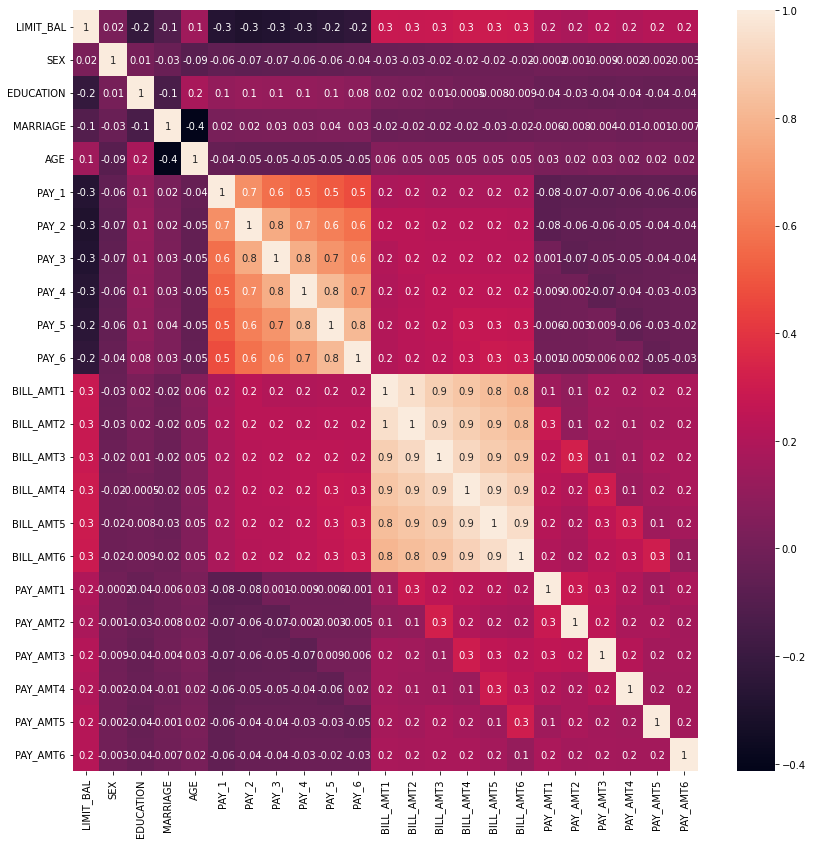

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 각 속성의 상관도 시각화
corr = X_features.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr,annot=True, fmt='.1g')

In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# BILL_AMT1 ~ BILL_AMT6까지 6개의 속성명 생성
cols_bill = ['BILL_AMT'+str(i) for i in range(1,7)]
print('대상 속성명:', cols_bill)

# 2개의 PCA 속성을 가진 PCA 객체 생성하고, explained_variance_ratio_ 계산을 위해 fit() 호출
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])
pca = PCA(n_components=2)
pca.fit(df_cols_scaled)
print('PCA Component별 변동성:', pca.explained_variance_ratio_)

대상 속성명: ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
PCA Component별 변동성: [0.90555253 0.0509867 ]


In [15]:
# 원본 데이터 세트와 6개의 컴포넌트로 PCA 변환한 데이터 세트의 분류 예측 결과 상호 비교
# 원본 데이터 세트에 랜덤 포레스트를 이용해 3개의 교차 검증 세트로 분류 예측

import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(n_estimators=300, random_state=156)
scores = cross_val_score(rcf, X_features, y_target, scoring='accuracy', cv=3)

print('CV=3인 경우의 개별 Fold세트별 정확도:',scores)
print('평균 정확도:{0:4f}'.format(np.mean(scores)))

CV=3인 경우의 개별 Fold세트별 정확도: [0.8083 0.8196 0.8232]
평균 정확도:0.817033


In [16]:
# 6개의 컴포넌트로 PCA 변환한 데이터 세트에 대해서 동일하게 분류 예측 적용
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 원본 데이터 세트에 먼저 StandardScaler 적용
scaler=StandardScaler()
df_scaled = scaler.fit_transform(X_features)

# 6개의 컴포넌트를 가진 PCA 변환을 수행하고 cross_val_score()로 분류 예측 수행
pca = PCA(n_components=6)
df_pca=pca.fit_transform(df_scaled)
scores_pca = cross_val_score(rcf, df_pca, y_target, scoring='accuracy', cv=3)

print('CV=3인 경우의 PCA 변환된 개별 Fold 세트별 정확도:',scores_pca)
print('PCA 변환 데이터 세트 평균 정확도:{0:4f}'.format(np.mean(scores_pca)))

CV=3인 경우의 PCA 변환된 개별 Fold 세트별 정확도: [0.7905 0.7967 0.803 ]
PCA 변환 데이터 세트 평균 정확도:0.796733


# LDA (Linear Discriminant Analysis)
#### LDA 개요
- LDA : 선형 판별 분석법으로 불리며 PCA와 유사하게 입력 데이터 세트를 저차원 공간에 투영해 차원을 축소하는 기법이지만, 중요한 차이는 지도학습의 분류에서 사용하기 쉽도록 개별 클래스를 분별할 수 있는 기준을 최대한 유지하면서 차원을 축소한다는 것
- PCA는 입력 데이터의 변동성이 가장 큰 축을 찾았지만 LDA는 입력 데이터의 결정 값 클래스를 최대한으로 분리할 수 있는 축을 찾음
- 클래스 간 분산(between-class scatter)과 클래스 내부 분산(within-class scatter)의 비율을 최대화하는 방식으로 차원을 축소
- 클래스 간 분산과 클래스 내부 분산 행렬을 생성한 뒤, 이 행렬에 기반해 고유벡터를 구하고 입력 데이터를 투영
- 클래스 내부와 클래스 간 분산 행렬을 구함. 두개의 행렬은 입력 데이터의 결정 값 클래스별로 개별 피처의 평균 벡터(mean vector)를 기반으로 구함

In [17]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)

lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.target) # fit 메서드를 호출할 때 결정값 입력
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


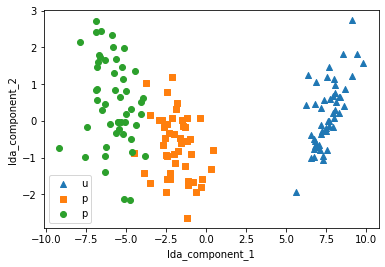

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

lda_columns = ['lda_component_1', 'lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda, columns=lda_columns)
irisDF_lda['target']=iris.target

# setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers = ['^', 's', 'o']

# setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target별로 다른 모양으로 산점도로 표시
for i, marker in enumerate(markers):
    x_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_1']
    y_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend('upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()

In [19]:
# 넘파이의 svd 모듈 임포트
import numpy as np
from numpy.linalg import svd

# 4*4 랜덤 행렬 a 생성 (개별 로우끼리의 의존성을 없애기 위해)
np.random.seed(121)
a = np.random.rand(4,4)
print(np.round(a,3))

[[0.111 0.211 0.233 0.152]
 [0.83  0.408 0.556 0.746]
 [0.248 0.969 0.953 0.49 ]
 [0.018 0.858 0.405 0.622]]


In [20]:
U, Sigma, Vt = svd(a) # U 행렬, Sigma 행렬, V 전치 행렬을 반환
print(U.shape, Sigma.shape, Vt.shape) # Sigma 행렬의 경우 0이 아닌 값의 경우만 1차원 행렬로 표현
print('U matrix:\n', np.round(U,3))
print('Sigma Value:\n', np.round(Sigma, 3))
print('V transpose matrix:\n', np.round(Vt,3))

(4, 4) (4,) (4, 4)
U matrix:
 [[-0.169  0.001 -0.128 -0.977]
 [-0.541 -0.828  0.126  0.076]
 [-0.662  0.355 -0.63   0.197]
 [-0.491  0.434  0.756 -0.014]]
Sigma Value:
 [2.153 0.725 0.356 0.007]
V transpose matrix:
 [[-0.298 -0.612 -0.543 -0.492]
 [-0.815  0.522  0.075 -0.239]
 [-0.148  0.174 -0.714  0.662]
 [ 0.474  0.568 -0.436 -0.513]]


In [21]:
# Sigma를 다시 0을 포함한 대칭행렬로 변환
Sigma_mat=np.diag(Sigma)

# U, Sigma_mat, Vt를 내적해 원본 행렬로 복원
a_ = np.dot(np.dot(U, Sigma_mat), Vt)
print(np.round(a_,3))

[[0.111 0.211 0.233 0.152]
 [0.83  0.408 0.556 0.746]
 [0.248 0.969 0.953 0.49 ]
 [0.018 0.858 0.405 0.622]]


In [22]:
# a 행렬의 3번째 로우를 첫번째 로우+두번째 로우로, 4번째 로우는 첫번쨰 로우와 같다고 업데이트
# 데이터 세트에 의존성을 부여
a[2] = a[0]+a[1]
a[3] = a[0]
print(np.round(a,3))

[[0.111 0.211 0.233 0.152]
 [0.83  0.408 0.556 0.746]
 [0.942 0.619 0.789 0.897]
 [0.111 0.211 0.233 0.152]]


In [23]:
# 다시 SVD를 수행해 Sigma값 확인
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('Sigma Value:\n', np.round(Sigma, 3))

(4, 4) (4,) (4, 4)
Sigma Value:
 [2.151 0.24  0.    0.   ]


In [24]:
# Sigma의 0에 대응되는 U, Sigma, Vt의 데이터를 제외하고 복원
# U 행렬의 경우는 Sigma와 내적을 수행하므로 Sigma의 앞 2행에 대응되는 앞 2열만 추출
U_ = U[:,:2]
Sigma_ = np.diag(Sigma[:2])

# V 전치 행렬의 경우는 앞 2행만 추출
Vt_ = Vt[:2]
print(U_.shape, Sigma_.shape, Vt_.shape)
# U, Sigma, Vt의 내적을 수행하며, 다시 원본 행렬 복원
a_ = np.dot(np.dot(U_,Sigma_), Vt_)
print(np.round(a_,3))

(4, 2) (2, 2) (2, 4)
[[0.111 0.211 0.233 0.152]
 [0.83  0.408 0.556 0.746]
 [0.942 0.619 0.789 0.897]
 [0.111 0.211 0.233 0.152]]


In [25]:
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

# 원본 행렬을 출력하고 SVD를 적용할 경우 U, Sigma, Vt의 차원 확인
np.random.seed(121)
matrix = np.random.random((6,6))
print('원본행렬:\n', matrix)
U, Sigma, Vt = svd(matrix, full_matrices=False)
print('\n분해 행렬 차원:', U.shape, Sigma.shape, Vt.shape)
print('\nSigma값 행렬:', Sigma)

# Truncated SVD로 Sigma 행렬의 특이값을 4개로 하여 Truncated SVD 수행
num_components = 4
U_tr, Sigma_tr, Vt_tr = svds(matrix, k=num_components)
print('\nTruncated SVD 분해 행렬 차원:', U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print('\nTruncated SVD Sigma값 행렬:', Sigma_tr)
matrix_tr = np.dot(np.dot(U_tr, np.diag(Sigma_tr)), Vt_tr) # output of TruncatedSVD

print('\nTruncated SVD로 분해 후 복원행렬:\n', matrix_tr)

원본행렬:
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]

분해 행렬 차원: (6, 6) (6,) (6, 6)

Sigma값 행렬: [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]

Truncated SVD 분해 행렬 차원: (6, 4) (4,) (4, 6)

Truncated SVD Sigma값 행렬: [0.55463089 0.83865238 0.88116505 3.2535007 ]

Truncated SVD로 분해 후 복원행렬:
 [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685 0.72673231 0.

Text(0, 0.5, 'TruncatedSVD Component 2')

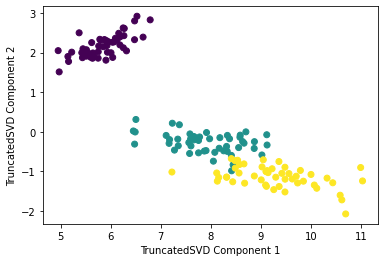

In [26]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris=load_iris()
iris_ftrs = iris.data
# 2개의 주요 컴포넌트로 TruncatedSVD 변환
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

# 산점도 2차원으로 TruncatedSVD 변환된 데이터 표현, 품종은 색깔로 구분
plt.scatter(x=iris_tsvd[:, 0], y=iris_tsvd[:,1], c=iris.target)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')

Text(0.5, 1.0, 'PCA Transformed')

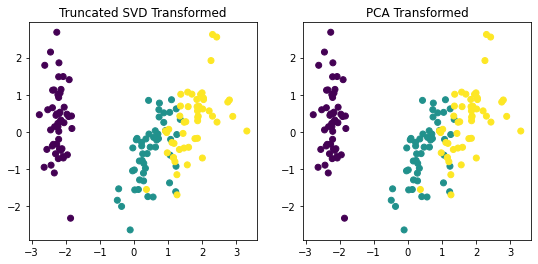

In [27]:
from sklearn.preprocessing import StandardScaler

# 붓꽃 데이터를 StandardScaler로 변환
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

# 스케일링된 데이터를 기반으로 TruncatedSVD 변환 수행
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

# 스케일링된 데이터를 기반으로 PCA 변환 수행
pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

# TruncatedSVD 변환 데이터를 왼쪽에, PCA 변환 데이터를 오른쪽에 표현
fig, (ax1, ax2) = plt.subplots(figsize=(9,4), ncols=2)
ax1.scatter(x=iris_tsvd[:,0], y=iris_tsvd[:,1], c=iris.target)
ax2.scatter(x=iris_pca[:,0], y=iris_pca[:,1], c=iris.target)
ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Transformed')